In [4]:
import os
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize
color = sns.color_palette()
#from plotly import tools
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
from sklearn import model_selection, preprocessing, metrics
#import lightgbm as lgb
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

%matplotlib inline

In [5]:
#please change this path to your local path
path = 'C:/Users/User/Documents/all/train.csv'

### function for pre-processing data

def load_df(csv_path=path, nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [6]:

train = load_df(path,100000)

Loaded train.csv. Shape: (100000, 55)


In [7]:
train.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserSize', 'device.browserVersion',
       'device.deviceCategory', 'device.flashVersion', 'device.isMobile',
       'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.metro',
       'geoNetwork.networkDomain', 'geoNetwork.networkLocation',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue

In [8]:
train["totals.transactionRevenue"].isnull().sum()

98601

In [9]:
train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype('float')

In [10]:
trainuser = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
trainuser

,fullVisitorId,totals.transactionRevenue
0,0000020424342248747,0.0
1,0000174067426171406,0.0
2,0000245437374675368,0.0
3,0000393882583300244,0.0
4,0000485418944539313,0.0
5,0000538867824729259,0.0
6,0000702913088027926,0.0
7,0000750929315523353,0.0
8,000082001414223176,0.0
9,0001156383977201253,0.0


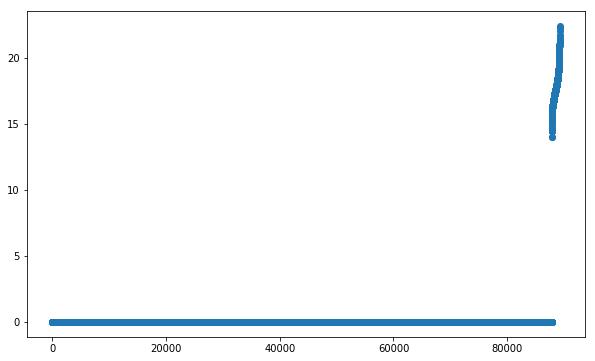

In [11]:
plt.figure(figsize= (10,6))
plt.scatter(range(trainuser.shape[0]), np.sort(np.log1p(trainuser["totals.transactionRevenue"].values)))
plt.show()


In [12]:
### well, seems most of values are 0
(trainuser['totals.transactionRevenue']!=0).sum()
## what the hey?

1346

In [13]:
trainall = load_df(path)

Loaded train.csv. Shape: (903653, 55)


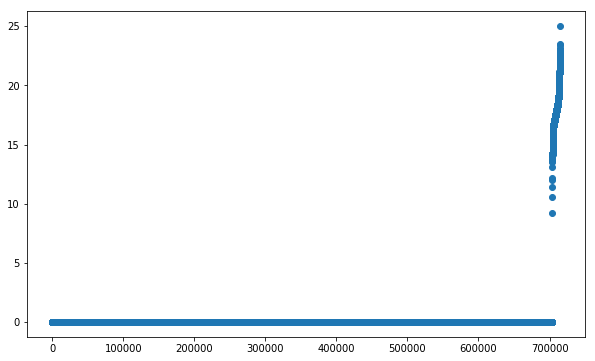

In [14]:
trainall['totals.transactionRevenue'] = trainall['totals.transactionRevenue'].astype('float')
trainuser = trainall.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()
plt.figure(figsize= (10,6))
plt.scatter(range(len(trainuser)), np.sort(np.log1p(trainuser["totals.transactionRevenue"].values)))
plt.show()

In [15]:
(trainuser['totals.transactionRevenue']!= 0).sum()
## ok most of the transaction numbers = 0, about 1% is non-zero 

9996

In [16]:
trainall

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not a

In [17]:
const_cols = [c for c in trainall.columns if trainall[c].nunique(dropna=False)==1 ]

In [18]:
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [19]:
trainall.visitNumber.nunique(dropna=False)

384

In [20]:
NonuseCols = trainall.nunique()[trainall.nunique(dropna=False)==1].index.values

In [21]:
NonuseCols

array(['socialEngagementType', 'device.browserSize',
       'device.browserVersion', 'device.flashVersion', 'device.language',
       'device.mobileDeviceBranding', 'device.mobileDeviceInfo',
       'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
       'device.mobileInputSelector', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution',
       'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude',
       'geoNetwork.networkLocation', 'totals.visits',
       'trafficSource.adwordsClickInfo.criteriaParameters'], dtype=object)

In [22]:
### these columns should be dropped cause they are the same values

In [ ]:
####